<a href="https://colab.research.google.com/github/atharvmendhe18/antariksh_lec_py/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.attention.multi_head_attention import activation

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path)
#df.values is a numpy array
X,y = df.values[:99, :-1], df.values[:99, -1]

X = X.astype('float32')

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [5]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1]

(66, 4) (33, 4) (66,) (33,)


In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape = (n_features,), activation = 'relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(8, activation = 'relu', kernel_initializer='he_normal'))
#softmax activation for probability based output layer(ig it gives a range of probabilities as i have also used softmax in traffic_sign_detection)
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

#The loss function used is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(X_train,y_train, epochs = 30, batch_size = 32, validation_data = (X_test,y_test))


Epoch 1/30
3/3 [==============================] - 1s 100ms/step - loss: 5.0495 - accuracy: 0.4848 - val_loss: 4.5457 - val_accuracy: 0.5152
Epoch 2/30
3/3 [==============================] - 0s 27ms/step - loss: 4.8324 - accuracy: 0.4848 - val_loss: 4.3447 - val_accuracy: 0.5152
Epoch 3/30
3/3 [==============================] - 0s 21ms/step - loss: 4.6337 - accuracy: 0.4848 - val_loss: 4.1519 - val_accuracy: 0.5152
Epoch 4/30
3/3 [==============================] - 0s 31ms/step - loss: 4.4345 - accuracy: 0.4848 - val_loss: 3.9744 - val_accuracy: 0.5152
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 4.2567 - accuracy: 0.4848 - val_loss: 3.8051 - val_accuracy: 0.5152
Epoch 6/30
3/3 [==============================] - 0s 19ms/step - loss: 4.0737 - accuracy: 0.4848 - val_loss: 3.6418 - val_accuracy: 0.5152
Epoch 7/30
3/3 [==============================] - 0s 22ms/step - loss: 3.9011 - accuracy: 0.4848 - val_loss: 3.4750 - val_accuracy: 0.5152
Epoch 8/30
3/3 [==========

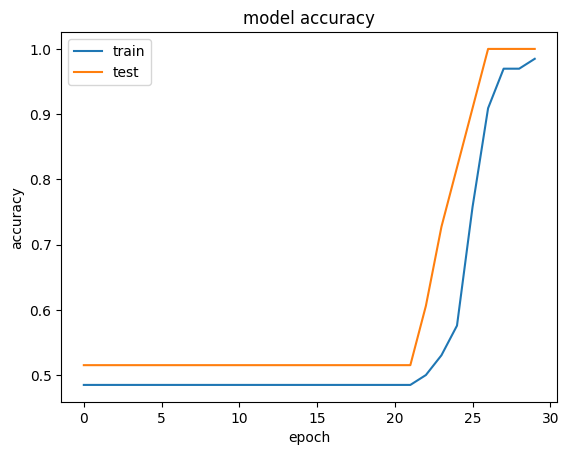

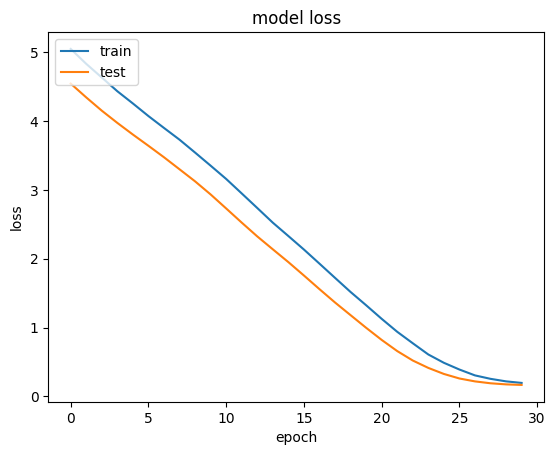

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.save("flowers_iris_predict")

In [ ]:
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])

print(yhat)
print(np.argmax(yhat))

1/1 [==============================] - 0s 41ms/step
[[0.88669854 0.11057454 0.0027269 ]]
0


In [21]:
y_pred = model.predict(X_test)
y_pred_c = []
for i in range(len(y_pred)):
  y_pred_c.append(np.argmax(y_pred[i]))
confusion_matrix(y_test, y_pred_c)

2/2 [==============================] - 0s 12ms/step


array([[17,  0],
       [ 0, 16]])